<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/%5BDataset%5D_OECD%EA%B5%AD%EA%B0%80_%EC%82%B6%EB%A7%8C%EC%A1%B1%EB%8F%84_%EB%B6%84%EC%84%9D_0108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Dataset] OECD 국가 삶 만족도 조사

- 2015년 기준 국가별 1인당 GDP 관련 데이터가 주어진다.
- 본 분석에서는 어느 국가의 1인당 GDP가 알려졌을 때 해당 국가의 삶의 만족도를 예측하는 모델을 구현한다.


## 1. 초기 세팅

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 데이터 불러오기

In [28]:
datapath = "https://raw.githubusercontent.com/codingalzi/handson-ml3/master/notebooks/data/lifesat/"

gdp_2015 = pd.read_csv(datapath + 'gdp_per_capita_2015.csv', thousands=',', delimiter='\t',
                       encoding='latin1', na_values='n/a')

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

## 3. EDA

[Columns]

- Country : 국가
- Subject Descriptor : 제목 설명자
- Units : 화폐 단위
- Scale	: 규모
- Country/Series-specific Notes : 국가(주)
- 2015
- Estimates Start After

In [29]:
print(gdp_2015.shape)
print("-" * 50)
print(oecd_bli.shape)

(190, 7)
--------------------------------------------------
(3292, 17)


In [30]:
gdp_2015.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [31]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [32]:
print(gdp_2015.info())
print("-" * 100)
print(oecd_bli.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 ----------

## 4. 데이터 전처리

### 4.1 gdp_2015 데이터셋 전처리

1) 국가명을 행 인덱스로 지정한다.

In [33]:
gdp_2015.set_index("Country", inplace=True)

gdp_2015

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


2) 이어서 1인당 GDP 데이터임을 명시하기 위해 열 이름 "2015"를 "GDP per capita"로 변경한다.

In [34]:
gdp_2015.rename(columns={"2015": "GDP per capita"}, inplace=True)

gdp_2015.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


### 4.1 oecd_bli 데이터셋 전처리

1) 측정지표(INDICATOR)분석

- 국가별 삶의 만족도는 'Life satisfaction'이라는 측정지표('Indicator') 열(column)의 특성값 중에 하나이다.
- 총 24개 측정지표가 사용되며 그중에 하나임을 확인할 수 있다.

In [35]:
oecd_bli.Indicator.unique()

array(['Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Job security', 'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Consultation on rule-making', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Assault rate', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

- 24개 측정지표 중 하나임을 확인한다.

In [36]:
oecd_bli.Indicator.unique().shape

(24,)

In [37]:
'Life satisfaction' in oecd_bli.Indicator.unique()

True

- 그런데 삶의 만족도와 관련된 행이 OECD 회원국의 수인 37보다 많다. 이는 삶의 만족도와 관련해서 데이터의 중복이 있다는 것을 의미한다.

In [38]:
mask = oecd_bli.Indicator == 'Life satisfaction'
oecd_bli[mask].shape

(179, 17)

- 무엇이 중복되었는지를 알아내기 위해 OECD 회원국가별로 'Indicator' 열에 포함된 24개 측정지표에 해당하는 값(value)만을 따로 추출한다.
- 즉, '더 나은 삶의 지수'(BLI, Better Life Index) 자료에서 볼 수 있는 아래 테이블 이미지와 같은 데이터프레임을 생성하고자 한다.

  - 행: OECD 회원국(Country)
  - 열: 측정지표(Indicator)
  - 항목 값: 국가별 지표 수치(Value)

- 이를 위해 국가명('Country' 열의 항목)을 행의 인덱스 이름으로, 'Indicator'의 항목을 열의 인덱스 이름으로 사용하는 데이터프레임을 생성한다.
- 해당 열과 항목에 해당하는 값은 'Value' 열에 포함된 값을 사용한다.

- 그런데 OECD의 원본 파일에는 각 측정지표의 값으로 국가별 소득 불평등('INEQUALITY')과 관련된 다섯 가지 기준에 따라 다른 값이 포함되어 있다

In [39]:
oecd_bli.INEQUALITY.unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

- 각 기준별 행의 개수는 다음과 같다.

In [40]:
arr1 = oecd_bli.INEQUALITY.unique()

sum = 0
for ineq in arr1:
    num_lines = (oecd_bli['INEQUALITY'] == ineq).sum()
    print(f"{ineq:>3}:\t{num_lines}행")

    sum += num_lines # 총 라인 수

print(f"\n 총:\t{sum}행")

TOT:	888행
 MN:	881행
WMN:	881행
HGH:	328행
 LW:	314행

 총:	3292행


- 전체 인구를 대상으로 하는 TOT 기준에 포함된 데이터만 추출했으며 앞서 확인한 대로 총 888개의 행으로 이루어진 데이터프레임이다.

In [41]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.shape

(888, 17)

- 여기서 37 * 24 = 888이 성립한다. 왜냐하면 이는 위데이터프레임이 37개 OECD 회원국별로 24개의 지표를 조사한 데이터를 포함한다는 의미이기 때문이다.
- 또한 측정된 지표값은 'Value' 열에 포함되어 있다.

- 이제 데이터프레임 객체의 pivot() 메서드를 이용하여 'Indicator' 의 항목에 대한 각 국가별 수치만을 추출하기 위해 국가명('Country' 열의 항목)을 행의 인덱스 이름으로,
- 'Indicator'의 항목을 열의 인덱스 이름으로 사용하면서 해당 행과 열의 항목에는 'Value' 열에 포함된 값을 사용하는 데이터프레임을 아래와 같이 생성할 수 있다.

In [42]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


- 참고로 대한민국의 측정지표별 수치는 다음과 같다

In [43]:
oecd_bli.loc['Korea']

Indicator
Air pollution                                   30.00
Assault rate                                     2.10
Consultation on rule-making                     10.40
Dwellings without basic facilities               4.20
Educational attainment                          82.00
Employees working very long hours               18.72
Employment rate                                 64.00
Homicide rate                                    1.10
Household net adjusted disposable income     19510.00
Household net financial wealth               29091.00
Housing expenditure                             16.00
Job security                                     3.20
Life expectancy                                 81.30
Life satisfaction                                5.80
Long-term unemployment rate                      0.01
Personal earnings                            36354.00
Quality of support network                      72.00
Rooms per person                                 1.40
Self-reported heal

- 알파벳 순으로 첫 5개 국가의 삶의 만족도는 "Life satisfaction" 열(column)에서 확인한다.

In [44]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

2) 데이터 병합

- 앞서 살펴본 대로 1인당 GDP 데이터는 OECD 회원국 이외의 국가 데이터도 포함되어 있다.
- OECD 회원국으로 제한해서 1인당 GDP와 삶의 만족도 사이의 관계를 파악하기 위해 앞서 구한 두 개의 데이터프레임을 하나로 병합한다.

  - 판다스의 merge() 함수를 이용한다.
  - OECD 회원국들만 대상으로 하기 위해 left_index=True와 right_index=True로 설정한다.

In [48]:
oecd_country_stats = pd.merge(left=gdp_2015['GDP per capita'],
                              right=oecd_bli['Life satisfaction'],
                              left_index=True, right_index=True)

oecd_country_stats.head(10)

,GDP per capita,Life satisfaction
Country,,
Australia,50961.865,7.3
Austria,43724.031,6.9
Belgium,40106.632,6.9
Brazil,8669.998,7.0
Canada,43331.961,7.3
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Denmark,52114.165,7.5
Estonia,17288.083,5.6


- 1인당 GDP와 삶의 만족도 사이의 선형 관계를 눈으로 확인하기 위해 국가를 1인당 GDP 기준 오름차순으로 정렬시킨다.

In [50]:
oecd_country_stats.sort_values(by="GDP per capita", inplace=True)

oecd_country_stats.head(10)

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


## 5. 머신러닝

### 5.1 데이터 세팅

- 선형회귀 모델을 훈련시킬 때 발생할 수 있는 과대적합 문제를 설명하기 위해 고의로 7개 국가의 데이터를 데이터 셋에서 제외시키고 훈련 시킬 때와 그렇지 않을 때를 비교하고자 한다.

- 제외 대상 국가는 브라질, 멕시코, 칠레, 체코, 노르웨이, 스위스, 룩셈부르크 이다.
- 데이터프레임에서 아래 인덱스를 이용하여 7개 국가를 제외시키고 훈련을 시킬 것이다.

In [51]:
omitted_indices = [0, 1, 6, 8, 33, 34, 35]

kept_indices = list( set(range(36)) - set(omitted_indices) )

- 제외된 7개 국가를 출력한다.

In [52]:
missing_data = oecd_country_stats.iloc[omitted_indices]

missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


- 7개 국가를 제외한 국가들의 1인당 GDP와 삶의 만족도 데이터를 지정한다.

In [53]:
sample_data = oecd_country_stats.iloc[kept_indices]

## 5.2 데이터 시각화

- 아래 코드는 앞서 언급된 7개 국가의 데이터를 제외한 국가들의 1인당 GDP와 삶의 만족도 사이의 관계를 산점도로 나타낸다.
- 선형관계를 잘 보여주는 다음 다섯 개 국가는 빨간색 점으로 표시한다.

헝가리(Hungary)
대한민국(Korea)
프랑스(France)
호주(Australia)
미국(United States)

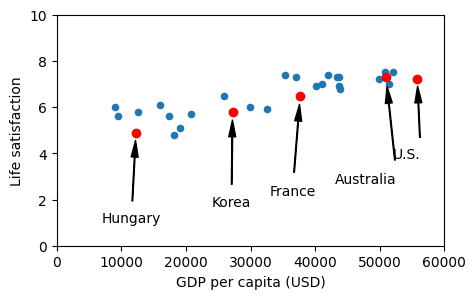

In [54]:
# 7개 국가를 제외한 국가들의 데이터 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# 언급된 5개 국가명과 좌표
position_text = {
    "Hungary": (7000, 1),
    "Korea": (24000, 1.7),
    "France": (33000, 2.2),
    "Australia": (43000, 2.7),
    "United States": (52000, 3.8),
}

# 5개 국가는 좌표를 이용하여 빨강색 점으로 표기
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]            # 5개 국가의 지표

    # 5개 국가명 표기
    country = "U.S." if country == "United States" else country  # 미국은 U.S. 로 표기

    # 화살표 그리기
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5) )

    # 5개 국가 산점도 그리기: 빨강색 점
    plt.plot(pos_data_x, pos_data_y, "ro")

# x 축 제목 새롭게 지정
plt.xlabel("GDP per capita (USD)")

plt.show()

- 언급된 5개 국가의 1인당 GDP와 삶의 만족도를 데이터에서 직접 확인하면 다음과 같다.

In [55]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


- 위 산점도에 따르면 1인당 GDP와 삶의 만족도가 어느 정도 선형 관계에 있는 것처럼 보인다.

### 5.3 모델 선정

1) 모델을 import 및 변수 저장한다.

In [56]:
from sklearn.linear_model import LinearRegression

lin1 = LinearRegression()

2) 훈련 데이터셋 지정

- 입력 데이터 셋은 x 축에, 타깃 데이터 셋은 y 축에 해당한다.
  - 입력 데이터: 1인당 GDP
  - 타깃 데이터: 삶의 만족도

- 입력 데이터와 타깃 데이터를 2차원 어레이로 지정한다.
- 사이킷런의 선형회귀 모델이 2차원 어레이 형식의 입력 데이터 셋과 타깃 데이터 셋을 요구한다.
- 넘파이의 c_ 함수를 활용해서 차원을 늘려준다.

In [57]:
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

- 변환 전의 처음 5개 데이터는 다음과 같다.

In [58]:
np.array(sample_data["GDP per capita"][:5])

array([ 9054.914,  9437.372, 12239.894, 12495.334, 15991.736])

- 2차원 어레이로 변환 된 입력 데이터의 처음 5개는 다음과 같다.

In [59]:
Xsample[:5]

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736]])

- 타깃 데이터 또한 마찬가지이다.

In [60]:
ysample[:5]

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1]])

### 5.4 모델 훈련

- 선형 모델의 fit() 메서드를 지정된 입력 데이터 셋과 타깃 터이터 셋을 인자로 사용해서 호출하면 최적의  θ0 와  θ1  파라미터를 찾는 훈련이 실행된다.
- 또한 훈련이 종료되면 최적의 파라미터가 업데이트된 객체 자신이 반환된다.

In [61]:
lin1.fit(Xsample, ysample)

LinearRegression()

- 훈련된 모델이 알아낸 최적 선형 모델의 절편과 기울기는 아래 두 속성에 저장된다.

  - intercept_[0]: 직선의 절편
  - coef_[0]: 직선의 기울기

In [62]:
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"절편:\t {t0}")
print(f"기울기:\t {t1}")

절편:	 4.853052800266436
기울기:	 4.911544589158484e-05


- 구해진 기울기와 절편을 이용하여 산점도와 함께 직선을 시각화한다.

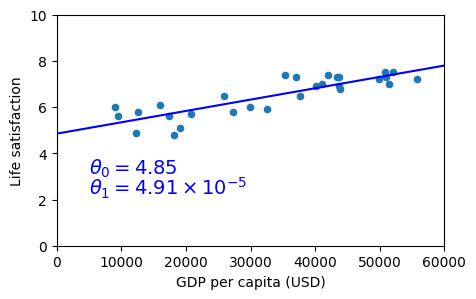

In [63]:
# 산점도
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

# 직선 그리기
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")

# 직선의 절편과 기울기 정보 명시
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

### 5.5 모델 활용

- 한 국가의 1인당 GDP가 알려졌을 때 훈련된 모델에 포함된  θ0  와  θ1  을 이용하여 해당 국가의 삶의 만족도를 예측한다.
- 예를 들어, OECD에 속하지 않는 키프러스(Cyprus)의 1인당 GDP를 이용하여 키프러스 국민의 삶의 만족도를 예측한다.

In [66]:
cyprus_gdp_2015 = gdp_2015.loc["Cyprus"]["GDP per capita"]

cyprus_gdp_2015

22587.49

- 훈련된 모델의 predict() 메서드가 아래 식을 이용하여 삶의 만족도를 계산한다.

  - θ0+θ1⋅'1인당GDP'

- 키프러스 국민의 삶의 만족도는 5.96 정도로 예측된다

## 6. 분석의 한계

- 머신러닝 알고리즘을 훈련시키다보면 다양한 어려움에 부딪힌다.
- 여기서는 선형회귀 모델이 훈련셋에 민감하게 반응하는 것을 보이고자 한다.

1) 훈련 데이터 추가

- 앞서 제외시킨 7개 국가의 데이터를 포함해서 선형회귀 모델을 훈련시켜 보자. 제외된 7개 국가의 데이터는 다음과 같다.

  - 브라질(Brazil)
  - 멕시코(Mexico)
  - 칠레(Chile)
  - 체코(Czech Repulic)
  - 노르웨이(Norway)
  - 스위스(Switzerland)
  - 룩셈부르크(Luxembourg)

- 위 분석에서 제외된 7개의 국가를 불러온다.

In [67]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


- 아래 좌표는 7개 국가명을 아래 그래프에서 표기할 때 사용할 좌표이다.

In [68]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

- 7개 국가를 포함한 전체 훈련 데이터 셋을 이용하여 훈련한 결과를 7개 국가를 제외했을 때의 훈련 결과와 비교한다.

  - 검정 실선: 7개 국가 포함 예측 선형 모델
  - 파랑 점선: 7개 국가 제외 예측 선형 모델

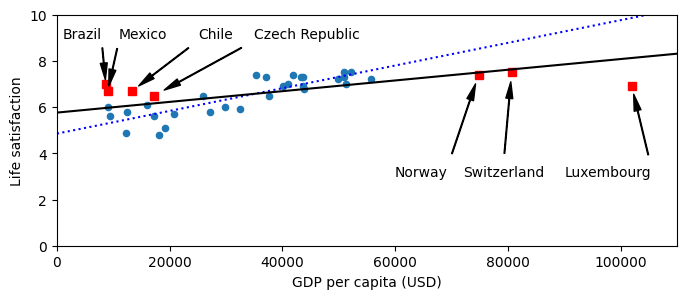

In [69]:
# 7개 국가를 제외한 국가들의 산점도 (파랑색 점)
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

# 7개 국가 산점도(빨강 점)
for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    # 7개 국가명 표기
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

# 7개 국가 제외 예측 선형 모델 그래프 (파랑 점선)
X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

# 7개 국가 포함 선형회귀 모델 훈련 및 예측
lin_reg_full = LinearRegression()
Xfull = np.c_[oecd_country_stats["GDP per capita"]]
yfull = np.c_[oecd_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

# 7개 국가 포함 예측 선형 모델 그래프(검정 실선)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

plt.show()

- 결론적으로 7개 국가를 포함하는 경우와 그렇지 않은 경우 상당히 다른 선형회귀 모델이 훈련된다.
- 즉, 모델 훈련이 훈련 데이터 셋에 민감하게 반응하는 과대 적합 현상이 발생한다.
- 이런 의미에서 선형회귀 모델은 1인당 GDP와 삶의 만족도 사이의 관계를 모델링 하기에 부적절하다.